<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/01%20Programaci%C3%B3n%20en%20Python/notebooks/exercises/Practica_Final_EDA_WoAns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LIZ ILEANA RODRIGUEZ GAMEZ

04-MARZO-2023

## ¿Qué es el análisis exploratorio de datos?

<font color=red>Es un enfoque para resumir, visualizar y familiarizarse con las características de un conjunto de datos.</font> 

### Valor del análisis de datos exploratorios

El **Análisis Exploratorio de Datos** (<font color=red>EDA</font>) es importante en todos nuestros proyectos de ciencia de datos porque nos permite validar y verificar la información que estamos procesando.

Tener mayor certeza en las relaciones que pudieran existir entre las variables nos puede ayudar a acercarnos a resultados más "certeros", con una mejor interpretación y, en algunas circunstancias, encontrar <font color=blue> información que quizá no era evidente o descubrir que las  que no valía la pena investigar, aportan algo más al proyecto.</font>

Además, se realiza para **definir y refinar** la selección de variables (características) que se utilizarán para el aprendizaje automático. 

### Métodos de análisis exploratorio de datos

Siempre es mejor explorar cada conjunto de datos usando múltiples técnicas exploratorias y comparar los resultados. 

El análisis exploratorio de datos se realiza principalmente utilizando métodos como:

   * *Visualización univariada* — proporciona estadísticas resumidas para cada campo en el conjunto de datos sin procesar
   * *Visualización bivariada* — se realiza para encontrar la relación entre cada variable en el conjunto de datos y la variable objetivo de interés
   * *Visualización multivariada* — se realiza para comprender las interacciones entre diferentes campos en el conjunto de datos
   * *Reducción de dimensionalidad* — ayuda a comprender los campos de los datos que explican la mayor variación entre las observaciones y permiten el procesamiento de un volumen reducido de datos. 

---
---

En resumen

   * Objetivos de la EDA
       * Descubrir patrones
       * Detectar anomalías
       * Planteamiento de las hipótesis
       * Comprobar supuestos

   * Cosas hechas durante EDA
       * Tendencias
       * Distribución
       * Medidas de tendencia central        
       * Medidas de dispersion
       * Correlaciones
       * Evaluación de la hipótesis
       * Exploración visual

# Proyectos

Puntos a cubrir:

El estudiante deberá presentar una notebook limpia con los análisis realizados al conjunto de datos propuesto del módulo 1.

Nota: Aplica de la misma manera si desean utilizar un conjunto diferente de datos. 

Cada sección deberá estar debidamente descrita, así como cada función auxiliar que se emplee en el proceso de análisis: que variables utiliza, que se hace, que retorna.

### Importando las librerías requeridas para EDA

A continuación se encuentran las bibliotecas que se utilizan para realizar EDA (análisis exploratorio de datos) en este ejercicio.

In [1]:
# Data manipulation libraries

import pandas as pd 
import numpy as np

# Data visualization 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Web scraping 
from bs4 import BeautifulSoup, Comment
from requests import get

### Cargar los datos

A continuación trabajaremos con un dataset que contiene 800 registros y diferentes características: 5 de tipo categórico y 7 de tipo numérico.

In [2]:
## Lectura de datos

# Fetch the dataset using the raw GitHub URL.

# Vease este Tutorial: https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92#:~:text=The%20easiest%20way%20to%20upload,method%20but%20it's%20not%20necessary).

url = 'https://raw.githubusercontent.com/DCDPUAEM/DCDP/main/01%20Programaci%C3%B3n%20en%20Python/data/Pokemon.csv'
pokemon_df = pd.read_csv(url)


## Impresion de dimensiones
pokemon_df.shape

(800, 13)

In [3]:
pokemon_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Para el siguiente análisis, deberán realizar las siguientes indicaciones:

    1.- Mostrar el tipo de variables que contiene este archivo.
    
    2.- Descartar columnas innecesarias, aquellas que consideren que no aportarán algo especial para el análisis exploratorio.

    3.- Mostrar una tabla de frecuencias de la columna "Generation" y hacer un plot que muestre cada una de ellas. Considerando valores y porcentajes
    
    4.- Realizar un filtro para generar un dataframe a partir de la columna "Generation". 
    
    5.- Buscar elementos duplicados y descartarlos - Podrían utilizar la función ".str.contains()"

In [4]:
# Tipo de variables
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [5]:
pokemon_df.drop(['#'], axis='columns', inplace=True)
pokemon_df.head(2)


,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False


1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64


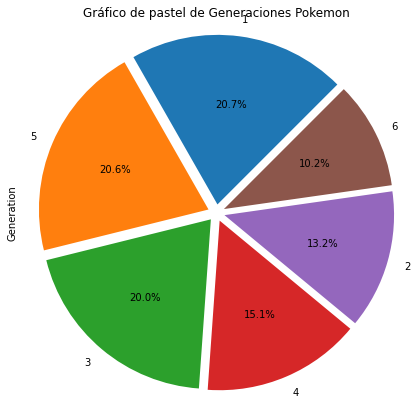

In [6]:
# Tabla de frecuencias con gráfico
g=pokemon_df["Generation"].value_counts()
plt.figure(figsize=(7,7))
g.plot.pie(autopct = '%1.1f%%', startangle=45, explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05)) 
plt.axis('equal') 
plt.title('Gráfico de pastel de Generaciones Pokemon')
print(g)
plt.show()


1    20.750
5    20.625
3    20.000
4    15.125
2    13.250
6    10.250
Name: Generation, dtype: float64


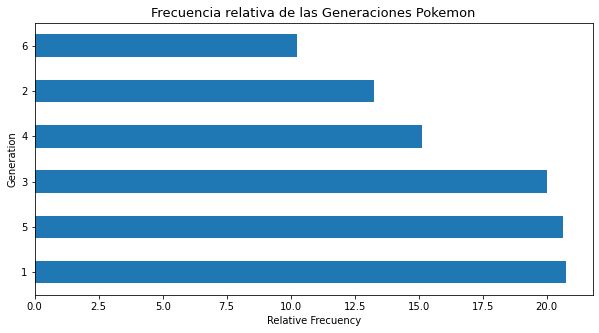

In [7]:
# Tabla de frecuencias relativas con gráfico
relative_frec=pokemon_df["Generation"].value_counts(normalize=True)*100

plt.figure(figsize=(10,5))
relative_frec.plot.barh()
plt.title('Frecuencia relativa de las Generaciones Pokemon', fontsize=13)
plt.xlabel('Relative Frecuency')
plt.ylabel('Generation')

print(relative_frec)
plt.show()


In [8]:
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   Total       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [9]:
# Filtro de columna Generation
poke_gen12 = pokemon_df[pokemon_df.Generation.isin([1, 2])].copy()
print(poke_gen12.Generation.unique())
print(poke_gen12.shape)


[1 2]
(272, 12)


In [10]:
poke_gen12

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
267,Tyranitar,Rock,Dark,600,100,134,110,95,100,61,2,False
268,TyranitarMega Tyranitar,Rock,Dark,700,100,164,150,95,120,71,2,False
269,Lugia,Psychic,Flying,680,106,90,130,90,154,110,2,True
270,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True


Posiblemente podamos encontrar repetidos dadas las caracteristicas de algunos de los datos que tenemos en este conjunto... podemos usar la función pd.duplicated() para hacer la comprobación.

In [11]:
poke_gen12.duplicated() 

0      False
1      False
2      False
3      False
4      False
       ...  
267    False
268    False
269    False
270    False
271    False
Length: 272, dtype: bool

In [12]:
# Sección auxiliar...

Filtremos aquellos que tienen palabras extra...

In [13]:
# Elementos duplicados y descarte
mega_filter = (poke_gen12.Name.str.contains('Mega '))
poke_gen12 = poke_gen12[~mega_filter]
print(poke_gen12.groupby('Generation').size(), '\nOk vamos bien!')

Generation
1    151
2    100
dtype: int64 
Ok vamos bien!


¡Bien!, En este momento deberíamos tener 251 elementos en nuestro dataframe. ahora realizaremos un análisis exploratorio general del mismo para entender mediante estadística y visualización, el comportamiento de los mismos.

### Atributos del dataset y cómo se relacionan entre sí

Como tenemos 251 elementos y 6 atributos para cada uno de ellos, analizaremos cómo se relacionan entre sí.

![img](https://www.centropkmn.com/wp-content/uploads/2016/07/cpokemon.com_entrenamiento_extremo-749x450.jpg)

¿Los Pokémon con mayor defensa también tienen un mayor ataque? ¿Los Pokémon rápidos también son buenos defensivamente?

Con ese fin, usaremos un par de cuadrículas de Seaborn. Es una cuadrícula bastante personalizable donde puede mapear diferentes tipos de gráficos en el triángulo superior, triángulo inferior y ejes diagonales.
La figura producida tiene tres secciones:

    Triángulo superior -> Diagrama de dispersión para cada pokemon  (diagrama de dispersión SCATTERPLOT de Seaborn)
    Diagonal -> Gráfico de densidad de kernel para cada atributo (Seabon KDEPLOT)
    Triángulo inferior -> Gráfico de dispersión con un ajuste de modelo de regresión lineal (gráfico REGPLOT de Seaborn)

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **p

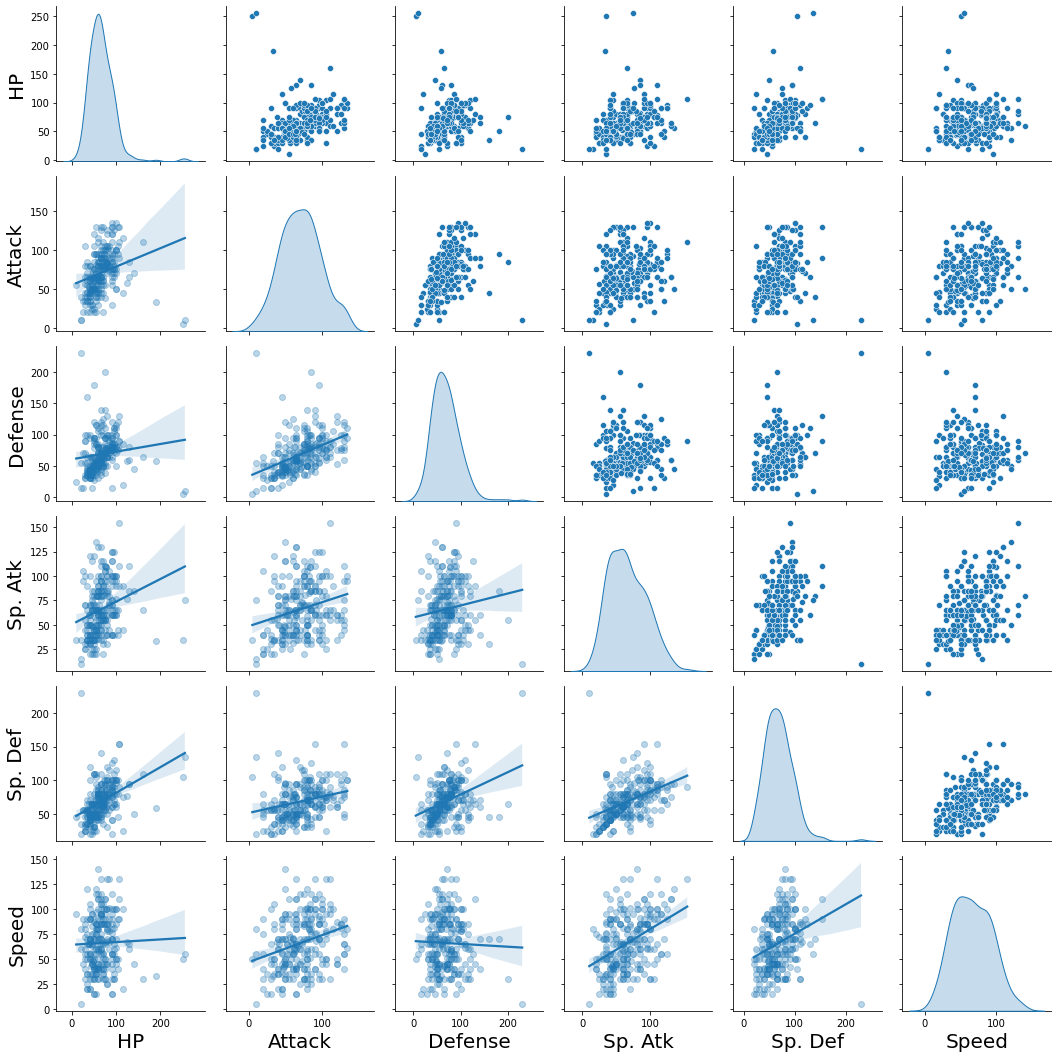

In [14]:
def my_pairgrid(input_df):
    mpl.rcParams["axes.labelsize"] = 20
    g = sns.PairGrid(input_df, vars=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'])
    g = g.map_diag(sns.kdeplot, shade=True)
    g = g.map_lower(sns.regplot, scatter_kws={'alpha':0.3})
    g = g.map_upper(sns.scatterplot)
    return(g)
_ = my_pairgrid(poke_gen12)

### Correlación entre atributos

Si bien el primer gráfico fue útil, quizás una mejor manera de visualizar la correlación entre atributos es un mapa de calor con un azul más fuerte que indica una correlación más alta.

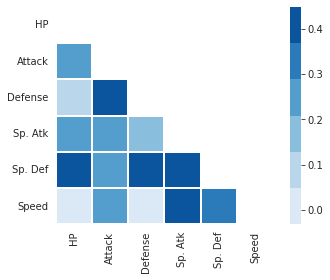

In [15]:
my_corr = poke_gen12.loc[:, 'HP': 'Speed'].corr() 
mask = np.zeros_like(my_corr) 
## Esta parte es para llenar la diagonal superior de espacios en blanco!
mask[np.triu_indices_from(mask)] = True 
with sns.axes_style("white"):
     ax = sns.heatmap(my_corr, mask=mask, square=True, cmap=sns.color_palette('Blues'), vmax=np.max(np.sort(my_corr.values)[:,-2]), linewidths=0.3)

# Análisis de atributos y tipos

Hagamos un análisis de cómo los atributos varían con el tipo.
Mi primera idea fue usar un Seaborn scatterplot ya que no tenemos tantos datos que puedan saturar la imagen.

Asignar quien es x, y, data y hue al usar el método de sns.scatterplot() y colocar el título adecuadamente

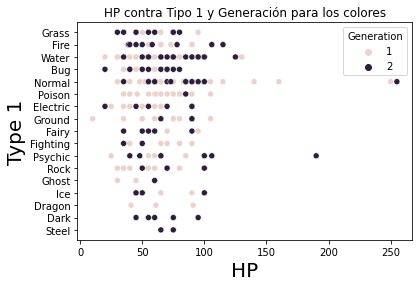

In [16]:
a = sns.scatterplot(x='HP', y='Type 1', hue='Generation', data=poke_gen12)
a.set_title('HP contra Tipo 1 y Generación para los colores')
plt.show()

Además de los valores atípicos, vamos a transformar el tipo "Fairy" a "Normal", por cuestiones de practicidad. En ambas columnas "Type 1" y "Type 2"

In [17]:
# Cambiar valores en las dos columnas solicitadas

poke_gen12.loc[poke_gen12['Type 1'] == "Fairy", 'Type 1'] = 'Normal'
poke_gen12.loc[poke_gen12['Type 2'] == "Fairy", 'Type 2'] = 'Normal'
poke_gen12

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
266,Pupitar,Rock,Ground,410,70,84,70,65,70,51,2,False
267,Tyranitar,Rock,Dark,600,100,134,110,95,100,61,2,False
269,Lugia,Psychic,Flying,680,106,90,130,90,154,110,2,True
270,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True


In [18]:
#Completa la función y trata de describir lo que hace
def attr_per_type(input_df, y_attr, hue_attr):
    mpl.rcParams["font.size"] = 18
    f, axes = plt.subplots(2, 3, figsize=(20, 20), sharey=True, sharex=True)
    poke_attributes = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
    counter = 0
    for row in range(2):
        for col in range(3):
            sns.boxplot(y = y_attr, x = poke_attributes[counter], data=input_df, ax=axes[row, col], showfliers=False)
            sns.scatterplot(y = y_attr, x = poke_attributes[counter], data=input_df, ax=axes[row, col], hue = hue_attr, palette=['black', 'orange'])
            
            counter += 1
            if (col == 0):
                axes[row, col].yaxis.label.set_visible(False)
                continue
            axes[row, col].yaxis.set_visible(False)
    return(f, axes)

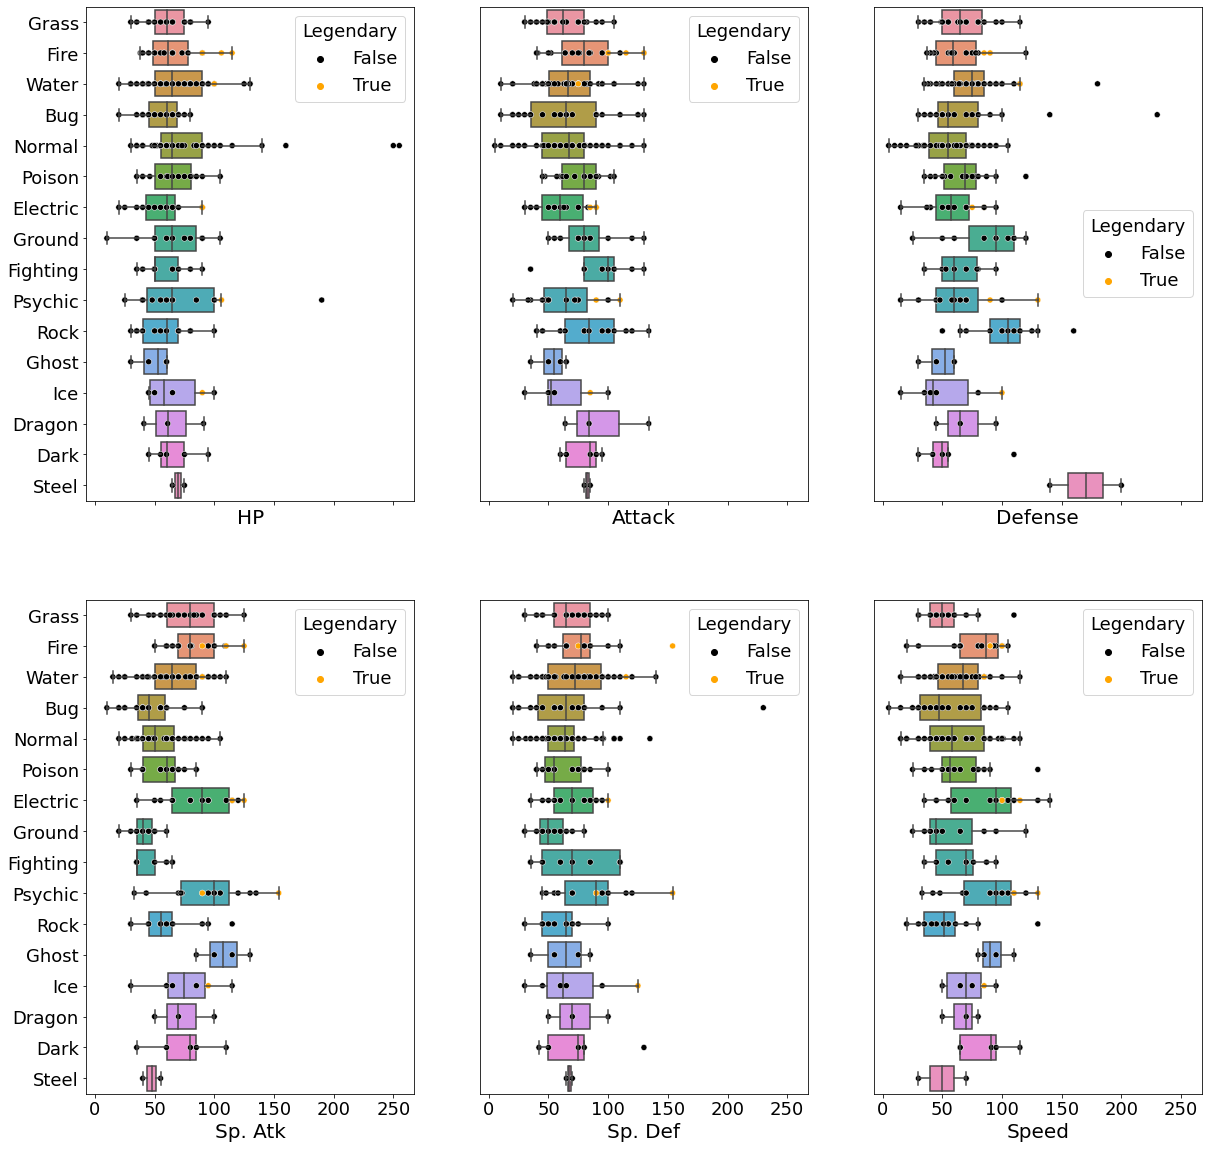

In [19]:
# Manda a llamar la funcion con el dataframe correspondiente y las columnas tipos y legendario
(f, axes) = attr_per_type(poke_gen12, 'Type 1', 'Legendary')
plt.show()

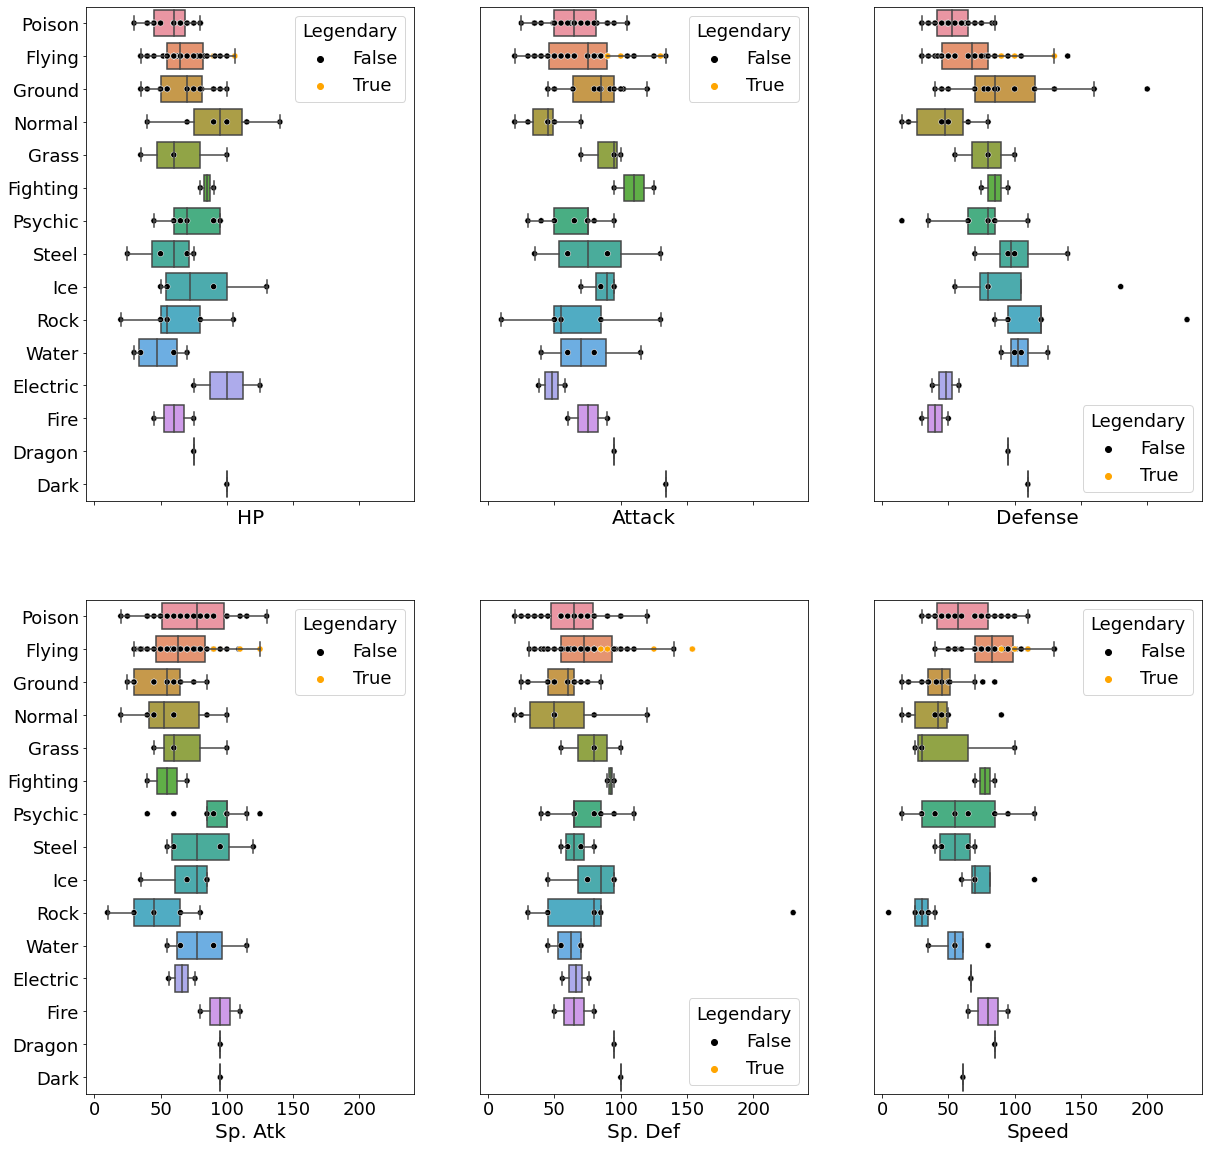

In [20]:
# Manda a llamar la funcion con el dataframe correspondiente y las columnas tipos y legendario
(f, axes) = attr_per_type(poke_gen12, 'Type 2', 'Legendary')
plt.show()

Muy bien, esto se ve mucho mejor! El problema con el conjunto de datos actual es que incluye Pokémon de menor evolución. Por ejemplo, Charmander, Charmeleon y Charizard están todos incluidos. Preferiría que solo se incluyera el último Pokémon de evolución porque la selección se realiza principalmente en función de esos. Tratemos de solucionar este problema raspando el árbol de evolución de Pokémon del sitio web de pokemondb. 


Voy a desglosar cada paso para que sea más comprensible.
---

### Web scraping para mejorar nuestro conjunto de datos

**Paso 1: encontrar la URL**

El sitio web que elegí es el sitio web de pokemondb que enumera las evoluciones de todos los Pokémon en esta forma:

![img](https://i.postimg.cc/qR8yX0qW/Pika.png)

In [21]:
poke_url = 'https://pokemondb.net/evolution#evo-g2'
#Hacer el get y el parseo correspondiente

response = get(poke_url)
html_soup = BeautifulSoup(response.text, 'html.parser' )

**Paso 2: examinar el HTML de la página y extraer los datos**

Ahora que tenemos el HTML, tenemos que examinar dónde se encuentra exactamente la información que queremos. Podemos utilizar las herramientas de desarrollo de Google Chrome para ver qué parte del árbol HTML nos interesa. Usaremos el método de find_all.

![img](https://i.postimg.cc/qRf8WwFf/Pika-HTML.png)

In [22]:
infocard = html_soup.find_all('div', {'class' : 'infocard-list-evo'})

**Paso 3: localizar y extraer toda la información útil en el HTML**

Ahora que hemos seleccionado todos los divs, necesitamos extraer la información que nos sea útil. Me gustaría obtener la siguiente información:

    La evolución es el pokemon (1º, 2º, etc.)
    El número de Pokémon (lo necesitaremos en el futuro para filtrar)
    El texto pequeño debajo del pokemon (nuevamente, esto se usará para filtrar)
    El nombre de pokemon

Toda la información que queremos se puede encontrar en el intervalo con la clase 'infocard-lg-data text-muted' como se puede ver en la captura de pantalla a continuación:

![img](https://i.postimg.cc/yxh1vgJp/Info-Pic.png)

Solo necesitamos extraer el primer pequeño (número de pokemon), el segundo pequeño (nombre de pokemon) y la etiqueta a con la clase 'ent-name' que tiene el texto pequeño debajo del pokemon.

También utilizo enumerate para crear un índice de la evolución del pokemon. Entonces, por ejemplo, en los casos simples (Charmander -> Charmeleon -> Charizard) con enumerate logro darle a Charmander el número 1, Charmeleon el número 2 y Charizard el número 3.

Desafortunadamente, esto falla estrepitosamente para los casos complejos (como el de Pikatchu) pero trataremos esto en un paso posterior.

In [23]:
raw = []
for chain in infocard:
    raw.append(([(i, x.find('small').getText(), 
                  x.find_all('small')[1].getText(), 
                  x.find('a', {'class':'ent-name'}).getText()) for i, x in enumerate(list(chain.find_all('span', {'class':'infocard-lg-data text-muted'})), 1)]))

raw[:4] 

[[(1, '#0001', 'Grass · Poison', 'Bulbasaur'),
  (2, '#0002', 'Grass · Poison', 'Ivysaur'),
  (3, '#0003', 'Grass · Poison', 'Venusaur')],
 [(1, '#0004', 'Fire', 'Charmander'),
  (2, '#0005', 'Fire', 'Charmeleon'),
  (3, '#0006', 'Fire · Flying', 'Charizard')],
 [(1, '#0007', 'Water', 'Squirtle'),
  (2, '#0008', 'Water', 'Wartortle'),
  (3, '#0009', 'Water', 'Blastoise')],
 [(1, '#0010', 'Bug', 'Caterpie'),
  (2, '#0011', 'Bug', 'Metapod'),
  (3, '#0012', 'Bug · Flying', 'Butterfree')]]

**Paso 4: limpieza del conjunto de datos**

Ahora que hemos extraído los datos, definitivamente necesitamos hacer algunos filtros:

    Eliminar todos los Pokémon que tienen 'alolan' en su nombre, ya que son de generaciones más nuevas, supongo.
    Elimina todos los Pokémon con un número superior a 251, ya que estos son nuevamente de generaciones más nuevas.
    Elimine todas las entradas restantes que tengan 1 o menos entradas de la lista

In [24]:
#Eliminar todas las tuplas que contienen "Alol" en el texto 
step_1 = [[elem for elem in branch_list if 'Alol' not in elem[2]] for branch_list in raw]


In [25]:
step_1

[[(1, '#0001', 'Grass · Poison', 'Bulbasaur'),
  (2, '#0002', 'Grass · Poison', 'Ivysaur'),
  (3, '#0003', 'Grass · Poison', 'Venusaur')],
 [(1, '#0004', 'Fire', 'Charmander'),
  (2, '#0005', 'Fire', 'Charmeleon'),
  (3, '#0006', 'Fire · Flying', 'Charizard')],
 [(1, '#0007', 'Water', 'Squirtle'),
  (2, '#0008', 'Water', 'Wartortle'),
  (3, '#0009', 'Water', 'Blastoise')],
 [(1, '#0010', 'Bug', 'Caterpie'),
  (2, '#0011', 'Bug', 'Metapod'),
  (3, '#0012', 'Bug · Flying', 'Butterfree')],
 [(1, '#0013', 'Bug · Poison', 'Weedle'),
  (2, '#0014', 'Bug · Poison', 'Kakuna'),
  (3, '#0015', 'Bug · Poison', 'Beedrill')],
 [(1, '#0016', 'Normal · Flying', 'Pidgey'),
  (2, '#0017', 'Normal · Flying', 'Pidgeotto'),
  (3, '#0018', 'Normal · Flying', 'Pidgeot')],
 [(1, '#0019', 'Normal', 'Rattata'), (2, '#0020', 'Normal', 'Raticate')],
 [],
 [(1, '#0021', 'Normal · Flying', 'Spearow'),
  (2, '#0022', 'Normal · Flying', 'Fearow')],
 [(1, '#0023', 'Poison', 'Ekans'), (2, '#0024', 'Poison', 'Arbok')],

In [26]:
#Remueve todos los pokemon que son mayores a la generacion 2 (N > 251) 
step_2 = [[elem for elem in branch_list if int(elem[1][1:]) <= 251] for branch_list in step_1] #remueve todos los pokempnes que son despues de la generación 2 (numero > 251) 

In [27]:
step_2


[[(1, '#0001', 'Grass · Poison', 'Bulbasaur'),
  (2, '#0002', 'Grass · Poison', 'Ivysaur'),
  (3, '#0003', 'Grass · Poison', 'Venusaur')],
 [(1, '#0004', 'Fire', 'Charmander'),
  (2, '#0005', 'Fire', 'Charmeleon'),
  (3, '#0006', 'Fire · Flying', 'Charizard')],
 [(1, '#0007', 'Water', 'Squirtle'),
  (2, '#0008', 'Water', 'Wartortle'),
  (3, '#0009', 'Water', 'Blastoise')],
 [(1, '#0010', 'Bug', 'Caterpie'),
  (2, '#0011', 'Bug', 'Metapod'),
  (3, '#0012', 'Bug · Flying', 'Butterfree')],
 [(1, '#0013', 'Bug · Poison', 'Weedle'),
  (2, '#0014', 'Bug · Poison', 'Kakuna'),
  (3, '#0015', 'Bug · Poison', 'Beedrill')],
 [(1, '#0016', 'Normal · Flying', 'Pidgey'),
  (2, '#0017', 'Normal · Flying', 'Pidgeotto'),
  (3, '#0018', 'Normal · Flying', 'Pidgeot')],
 [(1, '#0019', 'Normal', 'Rattata'), (2, '#0020', 'Normal', 'Raticate')],
 [],
 [(1, '#0021', 'Normal · Flying', 'Spearow'),
  (2, '#0022', 'Normal · Flying', 'Fearow')],
 [(1, '#0023', 'Poison', 'Ekans'), (2, '#0024', 'Poison', 'Arbok')],

In [28]:
#Remuever las entradas que no tengan información de step_2, las entradas que necesitamos son 
#mayores a 1, tomando el tamaño len() de cada elemento examinado.
step_3 = [elem for elem in step_2 if len(elem) > 1] 

In [29]:
step_3

[[(1, '#0001', 'Grass · Poison', 'Bulbasaur'),
  (2, '#0002', 'Grass · Poison', 'Ivysaur'),
  (3, '#0003', 'Grass · Poison', 'Venusaur')],
 [(1, '#0004', 'Fire', 'Charmander'),
  (2, '#0005', 'Fire', 'Charmeleon'),
  (3, '#0006', 'Fire · Flying', 'Charizard')],
 [(1, '#0007', 'Water', 'Squirtle'),
  (2, '#0008', 'Water', 'Wartortle'),
  (3, '#0009', 'Water', 'Blastoise')],
 [(1, '#0010', 'Bug', 'Caterpie'),
  (2, '#0011', 'Bug', 'Metapod'),
  (3, '#0012', 'Bug · Flying', 'Butterfree')],
 [(1, '#0013', 'Bug · Poison', 'Weedle'),
  (2, '#0014', 'Bug · Poison', 'Kakuna'),
  (3, '#0015', 'Bug · Poison', 'Beedrill')],
 [(1, '#0016', 'Normal · Flying', 'Pidgey'),
  (2, '#0017', 'Normal · Flying', 'Pidgeotto'),
  (3, '#0018', 'Normal · Flying', 'Pidgeot')],
 [(1, '#0019', 'Normal', 'Rattata'), (2, '#0020', 'Normal', 'Raticate')],
 [(1, '#0021', 'Normal · Flying', 'Spearow'),
  (2, '#0022', 'Normal · Flying', 'Fearow')],
 [(1, '#0023', 'Poison', 'Ekans'), (2, '#0024', 'Poison', 'Arbok')],
 [(1

**Paso 5: mejorar nuestro conjunto de datos existente**

Para el análisis me gustaría poder decir qué Pokémon son la última evolución de cada aarreglo y qué Pokémon no tienen evolución (y por lo tanto no se incluyeron en la lista en absoluto). 

* Por ejemplo: Charmander es el primero en el árbol de evolución Charmander-Charmeleon-Charizard y me gustaría excluirlo del análisis. Snorlax por otro lado no tiene evolución y me gustaría incluirlo en el análisis.

Por tanto, me gustaría crear 2 listas, una con todos los pokémon que pertenecen a una rama de evolución y otra con pokémon que son los últimos de una rama de evolución.


In [30]:
#Extraer todos los pokemon de la lista step_3
has_evolution = [[elem[3] for elem in branch_list] for branch_list in step_3] 
has_evolution

[['Bulbasaur', 'Ivysaur', 'Venusaur'],
 ['Charmander', 'Charmeleon', 'Charizard'],
 ['Squirtle', 'Wartortle', 'Blastoise'],
 ['Caterpie', 'Metapod', 'Butterfree'],
 ['Weedle', 'Kakuna', 'Beedrill'],
 ['Pidgey', 'Pidgeotto', 'Pidgeot'],
 ['Rattata', 'Raticate'],
 ['Spearow', 'Fearow'],
 ['Ekans', 'Arbok'],
 ['Pichu', 'Pikachu', 'Raichu'],
 ['Sandshrew', 'Sandslash'],
 ['Nidoran♀', 'Nidorina', 'Nidoqueen'],
 ['Nidoran♂', 'Nidorino', 'Nidoking'],
 ['Cleffa', 'Clefairy', 'Clefable'],
 ['Vulpix', 'Ninetales'],
 ['Igglybuff', 'Jigglypuff', 'Wigglytuff'],
 ['Zubat', 'Golbat', 'Crobat'],
 ['Oddish', 'Gloom', 'Vileplume', 'Bellossom'],
 ['Paras', 'Parasect'],
 ['Venonat', 'Venomoth'],
 ['Diglett', 'Dugtrio'],
 ['Meowth', 'Persian'],
 ['Psyduck', 'Golduck'],
 ['Mankey', 'Primeape'],
 ['Growlithe', 'Arcanine'],
 ['Growlithe', 'Arcanine'],
 ['Poliwag', 'Poliwhirl', 'Poliwrath', 'Politoed'],
 ['Abra', 'Kadabra', 'Alakazam'],
 ['Machop', 'Machoke', 'Machamp'],
 ['Bellsprout', 'Weepinbell', 'Victreeb

In [31]:
#Transformar la lista anterior en un arreglo de 1 dimension
has_evolution = sum(has_evolution, [])
has_evolution

['Bulbasaur',
 'Ivysaur',
 'Venusaur',
 'Charmander',
 'Charmeleon',
 'Charizard',
 'Squirtle',
 'Wartortle',
 'Blastoise',
 'Caterpie',
 'Metapod',
 'Butterfree',
 'Weedle',
 'Kakuna',
 'Beedrill',
 'Pidgey',
 'Pidgeotto',
 'Pidgeot',
 'Rattata',
 'Raticate',
 'Spearow',
 'Fearow',
 'Ekans',
 'Arbok',
 'Pichu',
 'Pikachu',
 'Raichu',
 'Sandshrew',
 'Sandslash',
 'Nidoran♀',
 'Nidorina',
 'Nidoqueen',
 'Nidoran♂',
 'Nidorino',
 'Nidoking',
 'Cleffa',
 'Clefairy',
 'Clefable',
 'Vulpix',
 'Ninetales',
 'Igglybuff',
 'Jigglypuff',
 'Wigglytuff',
 'Zubat',
 'Golbat',
 'Crobat',
 'Oddish',
 'Gloom',
 'Vileplume',
 'Bellossom',
 'Paras',
 'Parasect',
 'Venonat',
 'Venomoth',
 'Diglett',
 'Dugtrio',
 'Meowth',
 'Persian',
 'Psyduck',
 'Golduck',
 'Mankey',
 'Primeape',
 'Growlithe',
 'Arcanine',
 'Growlithe',
 'Arcanine',
 'Poliwag',
 'Poliwhirl',
 'Poliwrath',
 'Politoed',
 'Abra',
 'Kadabra',
 'Alakazam',
 'Machop',
 'Machoke',
 'Machamp',
 'Bellsprout',
 'Weepinbell',
 'Victreebel',
 'Ten

In [32]:
#Tomar la última entrada de la lista
last_evolutions  = [x[-1] for x in step_3] 
last_evolutions

[(3, '#0003', 'Grass · Poison', 'Venusaur'),
 (3, '#0006', 'Fire · Flying', 'Charizard'),
 (3, '#0009', 'Water', 'Blastoise'),
 (3, '#0012', 'Bug · Flying', 'Butterfree'),
 (3, '#0015', 'Bug · Poison', 'Beedrill'),
 (3, '#0018', 'Normal · Flying', 'Pidgeot'),
 (2, '#0020', 'Normal', 'Raticate'),
 (2, '#0022', 'Normal · Flying', 'Fearow'),
 (2, '#0024', 'Poison', 'Arbok'),
 (3, '#0026', 'Electric', 'Raichu'),
 (2, '#0028', 'Ground', 'Sandslash'),
 (3, '#0031', 'Poison · Ground', 'Nidoqueen'),
 (3, '#0034', 'Poison · Ground', 'Nidoking'),
 (3, '#0036', 'Fairy', 'Clefable'),
 (2, '#0038', 'Fire', 'Ninetales'),
 (3, '#0040', 'Normal · Fairy', 'Wigglytuff'),
 (3, '#0169', 'Poison · Flying', 'Crobat'),
 (4, '#0182', 'Grass', 'Bellossom'),
 (2, '#0047', 'Bug · Grass', 'Parasect'),
 (2, '#0049', 'Bug · Poison', 'Venomoth'),
 (2, '#0051', 'Ground', 'Dugtrio'),
 (2, '#0053', 'Normal', 'Persian'),
 (2, '#0055', 'Water', 'Golduck'),
 (2, '#0057', 'Fighting', 'Primeape'),
 (2, '#0059', 'Fire', 'Arc

In [33]:
#Aquellos que tienen 2 evoluciones finales (Politoed y Poliwrath, por ejemplo)
last_evolutions.extend([x[-2] for x in step_3 if x[-1][0] == 4])


In [34]:
#Hay algunos elementos que tienen multiples entradas
eevee_and_hitmon = [x[1:] for x in step_3 if (x[0][3] == 'Tyrogue') or (x[0][3] ==  'Eevee')]
eevee_and_hitmon = sum(eevee_and_hitmon, [])
last_evolutions.extend(eevee_and_hitmon)

#Se remueven algunos duplicados
last_evo_df = pd.DataFrame([[int(x[1][1:]), x[3]] for x in last_evolutions], columns=['Number', 'Pokemon'] )
last_evo_df = last_evo_df.drop_duplicates() 

Estamos al final del proceso, tenemos una lista de Pokémon que pertenecen a una rama de evolución y también tenemos una lista de Pokémon que son las últimas evoluciones. Sigamos adelante y actualicemos nuestro conjunto de datos inicial. Crearemos dos columnas adicionales.

In [35]:
poke_gen12['Has_evol'] = poke_gen12.Name.isin(has_evolution)
poke_gen12['Last_evol'] = poke_gen12.Name.isin(last_evo_df.Pokemon)
my_evolved_pokemon = poke_gen12.loc[(poke_gen12.Last_evol == True) | (poke_gen12.Has_evol == False)].copy()

<ipython-input-35-21244f5f8938>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poke_gen12['Has_evol'] = poke_gen12.Name.isin(has_evolution)
<ipython-input-35-21244f5f8938>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poke_gen12['Last_evol'] = poke_gen12.Name.isin(last_evo_df.Pokemon)


In [36]:
my_evolved_pokemon.shape

(137, 14)

In [37]:
my_evolved_pokemon.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Has_evol,Last_evol
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,True,True
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False,True,True
11,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False,True,True
15,Butterfree,Bug,Flying,395,60,45,50,90,80,70,1,False,True,True
18,Beedrill,Bug,Poison,395,65,90,40,45,80,75,1,False,True,True


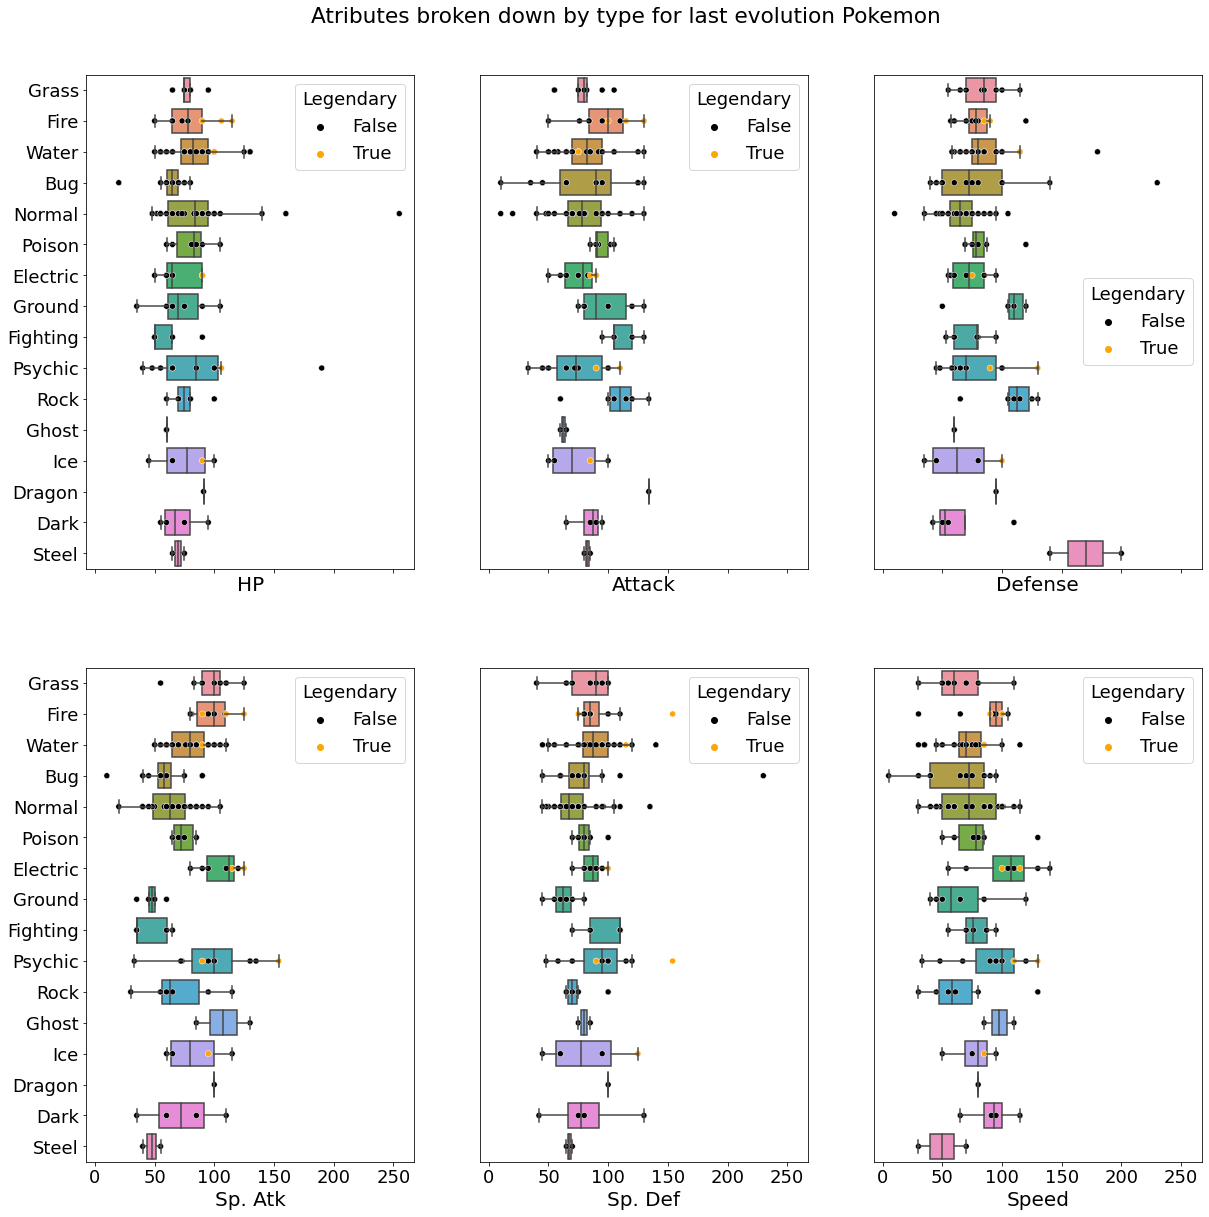

In [38]:
#Grafica ahora con el dataframe limpio
(f, axes) = attr_per_type(my_evolved_pokemon, 'Type 1', 'Legendary')
_ = f.suptitle('Atributes broken down by type for last evolution Pokemon', va='center', y=0.92)


Estos son los Pokémon reales que podrían usarse en una batalla de Pokémon, ya que tener una evolución significa que tus estadísticas aumentarán y tendrás acceso a un grupo de movimientos más amplio. Ahora, sería interesante plotear las frecuencias de los Tipos 1 y 2 que tenemos en este data set.

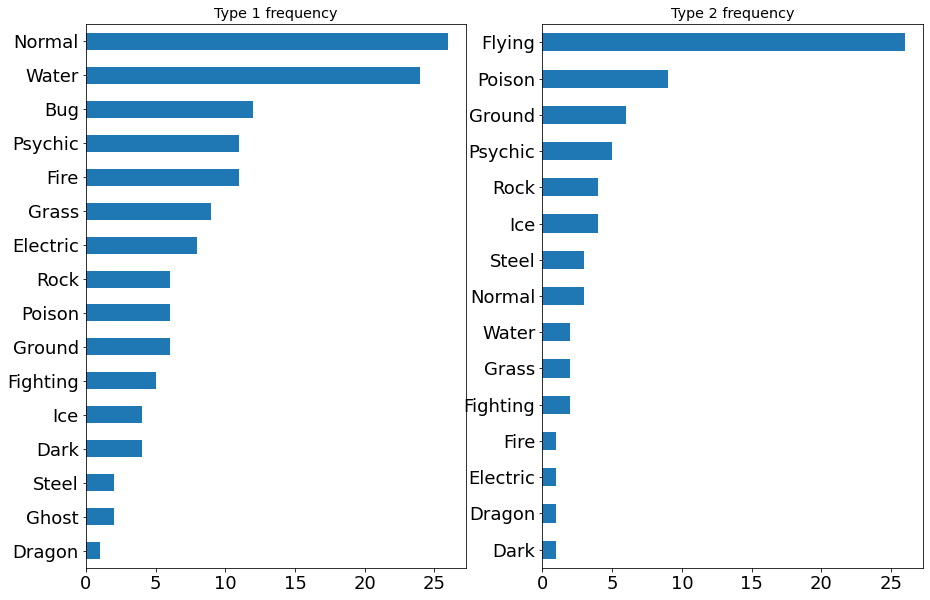

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))
mpl.rcParams["font.size"] = 12

ax1 = my_evolved_pokemon.groupby('Type 1').size().sort_values().plot(kind='barh', ax=ax1)
start, end = ax1.get_xlim()
ax1.xaxis.set_ticks(np.arange(start, end, 5))
ax1.axes.get_yaxis().get_label().set_visible(False)
_ = ax1.set_title('Type 1 frequency')

# Lo mismo, pero para el Type 2
ax2 = my_evolved_pokemon.groupby('Type 2').size().sort_values().plot(kind='barh', ax=ax2)
start, end = ax2.get_xlim()
ax2.xaxis.set_ticks(np.arange(start, end, 5))
ax2.axes.get_yaxis().get_label().set_visible(False)
_ = ax2.set_title('Type 2 frequency')


Ahora, para fines didácticos realizaremos un heatmap haciendo un conteo de ambos, mostrando aquellas combinaciones de tipos

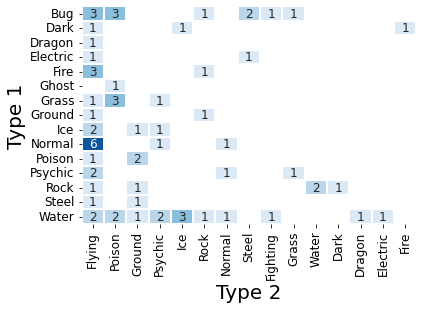

In [40]:
pivot_dat = my_evolved_pokemon.pivot_table(index='Type 1', columns='Type 2', aggfunc = 'size')
pivot_dat = pivot_dat[pivot_dat.sum().sort_values(ascending = False).index] #Reordering
sns.heatmap(pivot_dat, annot=True, cmap=sns.color_palette("Blues"), cbar=False, linewidths=0.3)
plt.show()

Ahora, mostremos la distribución de los datos utilizando el método de displot

In [41]:
stats = my_evolved_pokemon.loc[:, 'HP':'Speed']
stats 

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
2,80,82,83,100,100,80
6,78,84,78,109,85,100
11,79,83,100,85,105,78
15,60,45,50,90,80,70
18,65,90,40,45,80,75
...,...,...,...,...,...,...
264,100,75,115,90,115,85
267,100,134,110,95,100,61
269,106,90,130,90,154,110
270,106,130,90,110,154,90


0 HP
1 Attack


<ipython-input-42-5122849c15b4>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(my_evolved_pokemon[stat])
<ipython-input-42-5122849c15b4>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(my_evolved_pokemon[stat])


2 Defense
3 Sp. Atk


<ipython-input-42-5122849c15b4>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(my_evolved_pokemon[stat])
<ipython-input-42-5122849c15b4>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(my_evolved_pokemon[stat])


4 Sp. Def
5 Speed


<ipython-input-42-5122849c15b4>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(my_evolved_pokemon[stat])
<ipython-input-42-5122849c15b4>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(my_evolved_pokemon[stat])


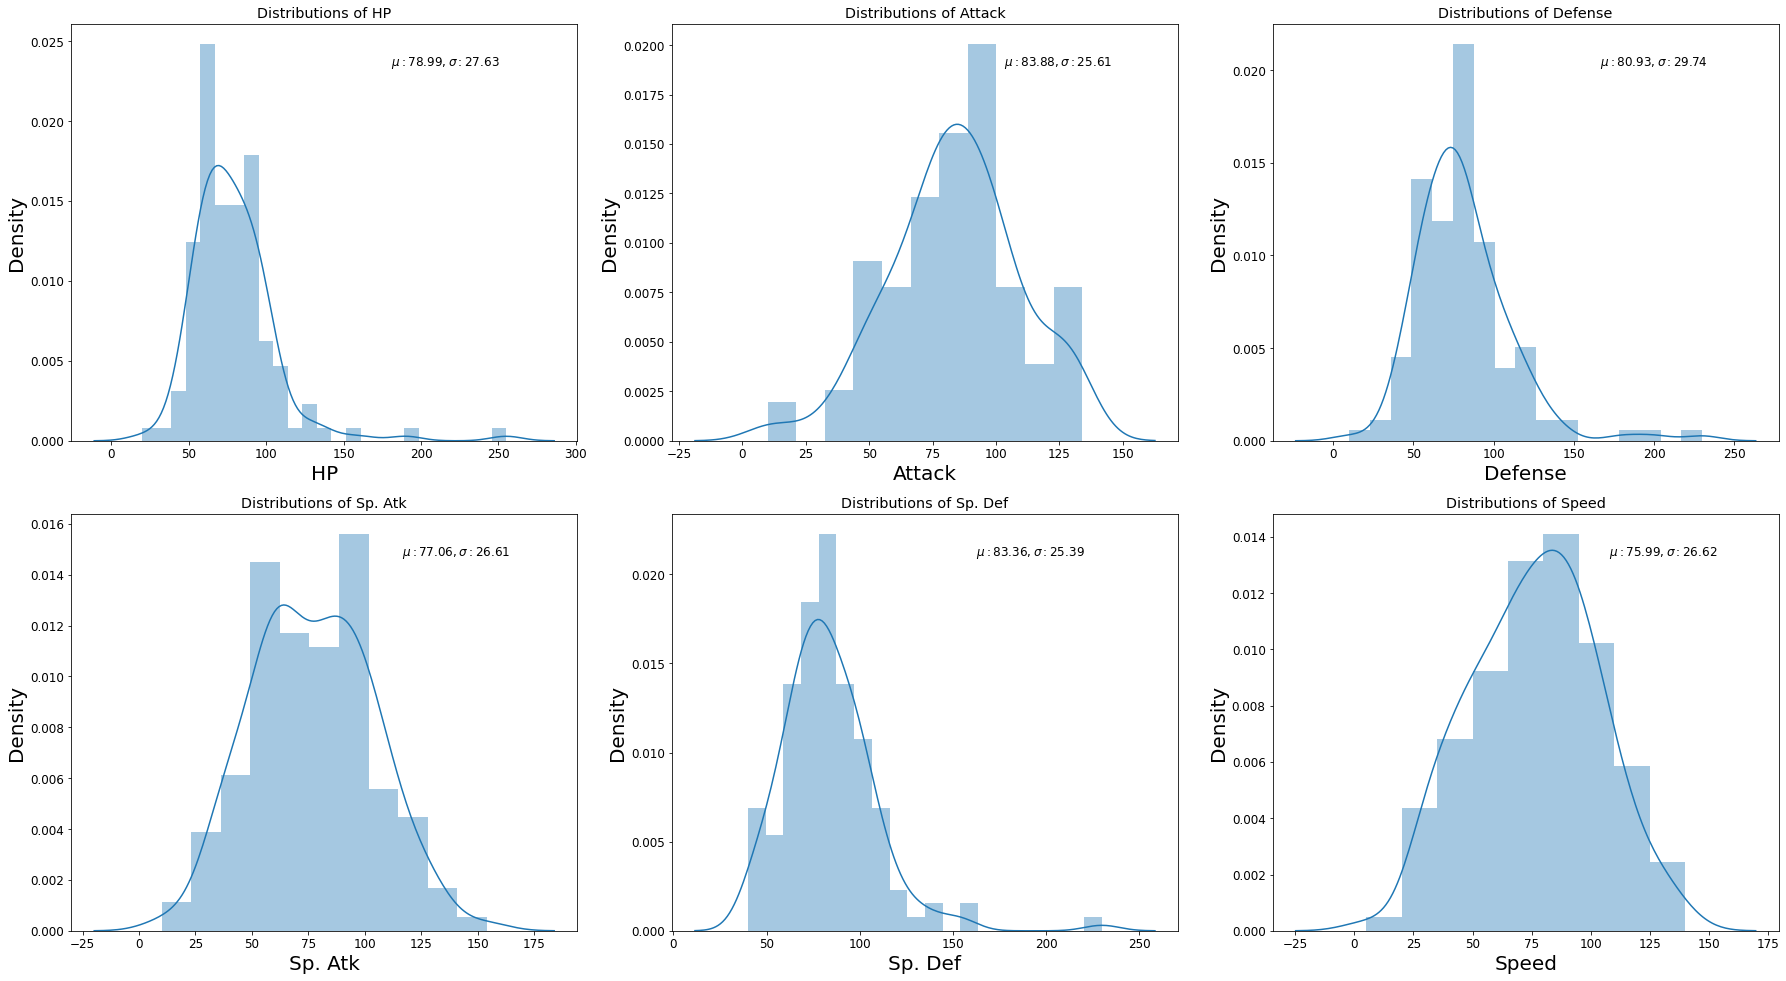

In [42]:
stats = my_evolved_pokemon.loc[:, 'HP':'Speed']
plt.figure(figsize=(25, 20))

for ii, stat in enumerate(stats):
    print(ii, stat)
    title = "Distributions of {stat}".format(
        stat = stat
    )
    plt.subplot(3, 3, ii+1)
    plt.title(title)
    sns.distplot(my_evolved_pokemon[stat])
    x = plt.gca().get_xlim()[1] * .6
    y = plt.gca().get_ylim()[1] * .9
    plt.text(x, y, '$\mu: {mu: .2f}, \sigma: {sigma: .2f}$'.format(mu = my_evolved_pokemon[stat].mean(), sigma=my_evolved_pokemon[stat].std()))
    
    
plt.tight_layout()
plt.show()

# Modelos para saber si son o no legendarios

In [43]:
my_evolved_pokemon['Legendary'].unique()

array([False,  True])

Vamos a realizar un descarte de columnas. 

Para X, solamente necesitaremos las columnas de características junto con su valor total (deberán ser 7 columnas)

Para Y, necesitamos la columna de legendarios ya que será nuestro objetivo.

In [44]:
X = my_evolved_pokemon.drop(columns = ['Name','Type 1', 'Type 2', 'Generation', 'Legendary',  'Has_evol', 'Last_evol'])
y = my_evolved_pokemon['Legendary']

In [45]:
X

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
2,525,80,82,83,100,100,80
6,534,78,84,78,109,85,100
11,530,79,83,100,85,105,78
15,395,60,45,50,90,80,70
18,395,65,90,40,45,80,75
...,...,...,...,...,...,...,...
264,580,100,75,115,90,115,85
267,600,100,134,110,95,100,61
269,680,106,90,130,90,154,110
270,680,106,130,90,110,154,90


Por primera ocasión, estaremos utilizando la librería de sklearn para auxiliarnos en hacer el split de datos

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y) # 80% y 20%

Estaremos utilizando por primera vez, algunos modelos como son la regresión logística, las máquinas de soporte vectorial, árboles de decisión y bosque aleatorio

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.ensemble import RandomForestClassifier as RF

alg1 = LogisticRegression(max_iter=5000)
alg2 = SVC(kernel = 'rbf') #lineal , polinomial, radial basis fuction (gaussiano)
alg3 = RF()
alg4 = DT()

Posteriormente, entrenaremos cada uno de los modelos.
Para obtener el valor del "Accuracy" (Exactitud), necesitamos comparar el valor original de ambos sets contra el valor predicho del algoritmo

In [48]:
from sklearn.metrics import accuracy_score
alg1.fit(X_train, y_train)   #Training the model

pd.DataFrame({"Accuracy on Train":[accuracy_score(y_train, alg1.predict(X_train))],
    "Accuracy on Test":[accuracy_score(y_test, alg1.predict(X_test))]})

,Accuracy on Train,Accuracy on Test
0,0.960784,0.971429


In [49]:
alg2.fit(X_train, y_train)   #Training the model

pd.DataFrame({"Accuracy on Train":[accuracy_score(y_train, alg2.predict(X_train))],
    "Accuracy on Test":[accuracy_score(y_test, alg2.predict(X_test))]})

,Accuracy on Train,Accuracy on Test
0,0.931373,0.942857


In [50]:
alg3.fit(X_train, y_train)   #Training the model

pd.DataFrame({"Accuracy on Train":[accuracy_score(y_train, alg3.predict(X_train))],
    "Accuracy on Test":[accuracy_score(y_test, alg3.predict(X_test))]})

,Accuracy on Train,Accuracy on Test
0,1.0,0.971429


In [51]:
alg4.fit(X_train, y_train)   #Training the model

pd.DataFrame({"Accuracy on Train":[accuracy_score(y_train, alg4.predict(X_train))],
    "Accuracy on Test":[accuracy_score(y_test, alg4.predict(X_test))]})

,Accuracy on Train,Accuracy on Test
0,1.0,1.0


Vamos a probar ahora nuestros modelos. Usaremos a estos ejemplos para observar si los modelos pueden realizar una buena predicción de si es o no un legendario. 

El siguiente ejemplo no debería ser clasificado como legendario...

In [52]:
pokemon_df.head(10)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [53]:
test = pokemon_df.iloc[[8]] 
test

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
8,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


In [54]:
test = pokemon_df.loc[8, "Total":"Speed"]
test

Total      634
HP          78
Attack     104
Defense     78
Sp. Atk    159
Sp. Def    115
Speed      100
Name: 8, dtype: object

In [55]:
test = pokemon_df.loc[8, "Total":"Speed"].to_numpy().reshape(1, -1)
test

array([[634, 78, 104, 78, 159, 115, 100]], dtype=object)

In [56]:
# Mandamos a llamar a los algoritmos con el np.array que obtuvimos 
# del registro en específico y sus caracteristicas correspondientes
alg1.predict(test)[0]

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


True

In [57]:
alg2.predict(test)[0]

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


False

In [58]:
alg3.predict(test)[0]

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


True

In [59]:
alg4.predict(test)[0]

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


True

### ¿Podrían tratar de dar una idea de porque en algunos casos los modelos se han equivocado?

**Dependerá de qué tipo de registro (e.j. Legendary) tiene más peso en el conjunto de datos y/o en que medida se está sobre o sub estimando el comportamiento de la poblacion en el conjunto de datos, el cual a fin de cuentas es una muestra de la realidad, entonces si cambiamos la muestra o los elmentos dentro de ella el comportamiento del modelo para predecir podrá ser diferente.** 

---
---

### Extender ejercicio para otras categorías usando pokedex_v2

Ahora, usaremos el archivo csv de pokedex_v2 para hacer otro pequeño ejercicio. La diferencia de este archivo es que tiene la columna de "status" con otras clasificaciones a diferencia de "Legendary" que solamente era True o False


In [60]:
#Lectura de datos
pokemon = pd.read_csv('https://raw.githubusercontent.com/DCDPUAEM/DCDP/main/01%20Programaci%C3%B3n%20en%20Python/data/pokedex_v2.csv')

Del mismo modo, construiremos nuestros conjuntos X y Y para hacer un ejercicio con estos datos. Pero ahora, Y tendrá que ser otra variable objetivo

In [61]:
#Impresion de df
pokemon.head(10)

,pokedex_number,Name,type_1,type_2,total_points,hp,attack,defense,sp_attack,sp_defense,speed,generation,status
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,Normal
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,Normal
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,Normal
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,Normal
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,Normal
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,Normal
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,Normal
7,6,Mega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,Normal
8,6,Mega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,Normal
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,Normal


In [62]:
#Split de X y y

X = pokemon.drop(columns = ['pokedex_number','Name','type_1', 'type_2', 'generation', 'status'])
y = pokemon['status']

In [63]:
#Imprimir y
y

0          Normal
1          Normal
2          Normal
3          Normal
4          Normal
          ...    
1023    Legendary
1024    Legendary
1025    Legendary
1026    Legendary
1027    Legendary
Name: status, Length: 1028, dtype: object

Si realizamos un conteo de valores de la generacion con respecto al status, podremos apreciar algo interesante. Está completamente desbalanceado!


In [64]:
#Value counts de generación vs status
pokemon.groupby('status').generation.describe()

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
Legendary,39.0,5.128205,2.202624,1.0,3.0,5.0,7.0,8.0
Mythical,29.0,4.724138,1.623412,1.0,4.0,5.0,6.0,7.0
Normal,915.0,3.925683,2.242163,1.0,2.0,4.0,5.0,8.0
Sub Legendary,45.0,4.844444,1.999495,1.0,3.0,5.0,7.0,7.0


Para este ejemplo, podríamos auxiliarnos un poco de una librería, dado que sí, efectivamente tenemos un poquito del desbalance de clases. 

Nos auxiliaremos de la librería [imbalanced-learn](https://imbalanced-learn.org/stable/user_guide.html#user-guide)

¿Qué es lo que hace esta librería?, en resumen, nos ayuda a muestrear. Como si fuera una especie de generador de números aleatorios (Monte Carlo)


In [65]:
#!pip install imbalanced-learn

Esto significa que si la clase mayoritaria tuviera 1000 ejemplos y la clase minoritaria 100, esta estrategia sobremuestrearía la clase minoritaria para que tenga 1000 ejemplos.


In [66]:
from imblearn.over_sampling import RandomOverSampler

In [67]:
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)

In [68]:
#Value counts de generación vs status
pokemon.groupby('status')['generation'].value_counts().unstack().reset_index()


generation,status,1,2,3,4,5,6,7,8
0,Legendary,3.0,2.0,6.0,4.0,5.0,5.0,8.0,6.0
1,Mythical,1.0,1.0,5.0,6.0,6.0,5.0,5.0,NaN
2,Normal,185.0,101.0,147.0,105.0,151.0,75.0,69.0,82.0
3,Sub Legendary,3.0,3.0,7.0,6.0,9.0,NaN,17.0,NaN


In [69]:
X_over

,total_points,hp,attack,defense,sp_attack,sp_defense,speed
0,318,45,49,49,65,65,45
1,405,60,62,63,80,80,60
2,525,80,82,83,100,100,80
3,625,80,100,123,122,120,80
4,309,39,52,43,60,50,65
...,...,...,...,...,...,...,...
1909,600,100,128,90,77,77,128
1910,720,120,120,120,120,120,120
1911,480,80,80,80,80,80,80
1912,300,46,65,65,55,35,34


In [70]:
 y_over

0         Normal
1         Normal
2         Normal
3         Normal
4         Normal
          ...   
1909    Mythical
1910    Mythical
1911    Mythical
1912    Mythical
1913    Mythical
Name: status, Length: 1914, dtype: object

In [71]:
y.value_counts()

Normal           915
Sub Legendary     45
Legendary         39
Mythical          29
Name: status, dtype: int64

In [72]:
y_over.value_counts()

Normal           915
Mythical         915
Sub Legendary     45
Legendary         39
Name: status, dtype: int64

Por ejemplo, un conjunto de datos con 1000 ejemplos en la clase mayoritaria y 100 ejemplos en la clase minoritaria se submuestreará de modo que ambas clases tengan 100 ejemplos en el conjunto de datos de entrenamiento transformado.


In [73]:
from imblearn.under_sampling import RandomUnderSampler

In [74]:
undersample = RandomUnderSampler(sampling_strategy='majority')

Luego, la transformación puede ajustarse y aplicarse a un conjunto de datos en un solo paso llamando a la función fit_resample () y pasando el conjunto de datos sin transformar como argumentos.


In [75]:
# fit and apply the transform
X_under, y_under = undersample.fit_resample(X, y)

In [76]:
y_under.value_counts()

Sub Legendary    45
Legendary        39
Mythical         29
Normal           29
Name: status, dtype: int64

Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o las diferencias en la precisión numérica. Considera ejecutar el ejemplo varias veces y compara el resultado promedio.

El modelo elegido y la configuración de remuestreo son arbitrarios, diseñados para proporcionar una plantilla que puede usar para probar el submuestreo con su conjunto de datos y algoritmo de aprendizaje en lugar de resolver de manera óptima el conjunto de datos sintéticos.

Ahora, vuelvan a entrenar los modelos con estos datasets y volvamos a repetir el ejercicio anterior.

1.- Entrenar los modelos para los conjuntos X y Y considerando la columna de status. Prueben nuevamente los datos que usamos en la parte superior para observar que resultado ahora nos arroja.

2.- Realizar lo mismo, pero ahora con los conjuntos _over

3.- Realizar lo mismo, pero ahora con los conjuntos _under

**1. Entrenamiento para valores de estatus... valores originales**

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y) # 80% y 20%

In [78]:
#from sklearn.metrics import accuracy_score
alg1.fit(X_train, y_train)   #Training the model

pd.DataFrame({"Accuracy on Train":[accuracy_score(y_train, alg1.predict(X_train))],
    "Accuracy on Test":[accuracy_score(y_test, alg1.predict(X_test))]})

,Accuracy on Train,Accuracy on Test
0,0.92607,0.898833


In [79]:
alg2.fit(X_train, y_train)   #Training the model

pd.DataFrame({"Accuracy on Train":[accuracy_score(y_train, alg2.predict(X_train))],
    "Accuracy on Test":[accuracy_score(y_test, alg2.predict(X_test))]})

,Accuracy on Train,Accuracy on Test
0,0.922179,0.898833


In [80]:
alg3.fit(X_train, y_train)   #Training the model

pd.DataFrame({"Accuracy on Train":[accuracy_score(y_train, alg3.predict(X_train))],
    "Accuracy on Test":[accuracy_score(y_test, alg3.predict(X_test))]})

,Accuracy on Train,Accuracy on Test
0,1.0,0.941634


In [81]:
alg4.fit(X_train, y_train)   #Training the model

pd.DataFrame({"Accuracy on Train":[accuracy_score(y_train, alg4.predict(X_train))],
    "Accuracy on Test":[accuracy_score(y_test, alg4.predict(X_test))]})

,Accuracy on Train,Accuracy on Test
0,1.0,0.933852


*COMPROBACIÓN DEL ENTRENAMIENTO*

In [82]:
pokemon_df.iloc[8]


Name          CharizardMega Charizard Y
Type 1                             Fire
Type 2                           Flying
Total                               634
HP                                   78
Attack                              104
Defense                              78
Sp. Atk                             159
Sp. Def                             115
Speed                               100
Generation                            1
Legendary                         False
Name: 8, dtype: object

In [83]:
test = pokemon_df.loc[8, "Total":"Speed"].to_numpy().reshape(1, -1)
test

array([[634, 78, 104, 78, 159, 115, 100]], dtype=object)

In [84]:
y.iloc[8]

'Normal'

In [85]:
alg1.predict(test)[0], alg2.predict(test)[0], alg3.predict(test)[0], alg4.predict(test)[0]

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


('Normal', 'Normal', 'Normal', 'Normal')

**2. Entrenamiento para valores de estatus... con conjunto over**

In [86]:
# Definir X, y
X = X_over
y = y_over

In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y) # 80% y 20%

In [88]:
alg1.fit(X_train, y_train)   #Training the model

pd.DataFrame({"Accuracy on Train":[accuracy_score(y_train, alg1.predict(X_train))],
    "Accuracy on Test":[accuracy_score(y_test, alg1.predict(X_test))]})

,Accuracy on Train,Accuracy on Test
0,0.87108,0.860125


In [89]:
alg2.fit(X_train, y_train)   #Training the model

pd.DataFrame({"Accuracy on Train":[accuracy_score(y_train, alg2.predict(X_train))],
    "Accuracy on Test":[accuracy_score(y_test, alg2.predict(X_test))]})

,Accuracy on Train,Accuracy on Test
0,0.897561,0.876827


In [90]:
alg3.fit(X_train, y_train)   #Training the model

pd.DataFrame({"Accuracy on Train":[accuracy_score(y_train, alg3.predict(X_train))],
    "Accuracy on Test":[accuracy_score(y_test, alg3.predict(X_test))]})

,Accuracy on Train,Accuracy on Test
0,0.999303,0.97286


In [91]:
alg4.fit(X_train, y_train)   #Training the model

pd.DataFrame({"Accuracy on Train":[accuracy_score(y_train, alg4.predict(X_train))],
    "Accuracy on Test":[accuracy_score(y_test, alg4.predict(X_test))]})

,Accuracy on Train,Accuracy on Test
0,0.999303,0.954071


*COMPROBACIÓN DEL ENTRENAMIENTO*

In [92]:
test = pokemon_df.loc[8, "Total":"Speed"].to_numpy().reshape(1, -1)
test

array([[634, 78, 104, 78, 159, 115, 100]], dtype=object)

In [93]:
y_over.iloc[8]

'Normal'

In [94]:
# Predicciones 

alg1.predict(test)[0], alg2.predict(test)[0], alg3.predict(test)[0], alg4.predict(test)[0]

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


('Mythical', 'Mythical', 'Normal', 'Legendary')

**3. Entrenamiento para valores de estatus... con conjunto under**

In [95]:
# Definir X, y
X = X_under
y = y_under

In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y) # 80% y 20%

In [97]:
alg1.fit(X_train, y_train)   #Training the model

pd.DataFrame({"Accuracy on Train":[accuracy_score(y_train, alg1.predict(X_train))],
    "Accuracy on Test":[accuracy_score(y_test, alg1.predict(X_test))]})

,Accuracy on Train,Accuracy on Test
0,0.688679,0.444444


In [98]:
alg2.fit(X_train, y_train)   #Training the model

pd.DataFrame({"Accuracy on Train":[accuracy_score(y_train, alg2.predict(X_train))],
    "Accuracy on Test":[accuracy_score(y_test, alg2.predict(X_test))]})

,Accuracy on Train,Accuracy on Test
0,0.698113,0.583333


In [99]:
alg3.fit(X_train, y_train)   #Training the model

pd.DataFrame({"Accuracy on Train":[accuracy_score(y_train, alg3.predict(X_train))],
    "Accuracy on Test":[accuracy_score(y_test, alg3.predict(X_test))]})

,Accuracy on Train,Accuracy on Test
0,1.0,0.722222


In [100]:
alg4.fit(X_train, y_train)   #Training the model

pd.DataFrame({"Accuracy on Train":[accuracy_score(y_train, alg4.predict(X_train))],
    "Accuracy on Test":[accuracy_score(y_test, alg4.predict(X_test))]})

,Accuracy on Train,Accuracy on Test
0,1.0,0.75


COMPROBACIÓN DEL ENTRENAMIENTO

In [101]:
test = pokemon_df.loc[8, "Total":"Speed"].to_numpy().reshape(1, -1)
test

array([[634, 78, 104, 78, 159, 115, 100]], dtype=object)

In [102]:
y_under.iloc[8]

'Legendary'

In [103]:
# Predicciones 

alg1.predict(test)[0], alg2.predict(test)[0], alg3.predict(test)[0], alg4.predict(test)[0]

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


('Mythical', 'Sub Legendary', 'Mythical', 'Sub Legendary')

**ENTRENAMIENTO DE MODELOS**

In [121]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [122]:
# ENTRENAMIENTO DE MODELOS CON 10 REPECICIONES 
kfold_validacion = KFold(10) 
resultados = cross_val_score(alg1, X, y, cv = kfold_validacion)
print(resultados)
resultados.mean() # para ver el promedio de los resultados 


[0.73333333 0.66666667 0.57142857 0.         0.21428571 0.42857143
 0.71428571 0.28571429 0.21428571 0.28571429]


0.41142857142857137

In [123]:
kfold_validacion = KFold(10) 
resultados = cross_val_score(alg2, X, y, cv = kfold_validacion)
print(resultados)
resultados.mean() # para ver el promedio de los resultados 


[1.         0.66666667 0.64285714 0.         0.14285714 0.5
 0.78571429 0.85714286 0.92857143 0.92857143]


0.6452380952380953

In [124]:
kfold_validacion = KFold(10) 
resultados = cross_val_score(alg3, X, y, cv = kfold_validacion)
print(resultados)
resultados.mean() # para ver el promedio de los resultados 


[0.86666667 0.66666667 0.57142857 0.42857143 0.28571429 0.64285714
 0.85714286 0.5        0.64285714 0.85714286]


0.6319047619047619

In [125]:

kfold_validacion = KFold(10) 
resultados = cross_val_score(alg4, X, y, cv = kfold_validacion)
print(resultados)
resultados.mean() # para ver el promedio de los resultados 

[0.8        0.33333333 0.57142857 0.35714286 0.35714286 0.71428571
 0.64285714 0.64285714 0.64285714 0.71428571]


0.5776190476190477

**VALIDACIÓN**

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [127]:
# CONJUNTO ORIGINAL

alg1.fit(X_train, y_train)
alg2.fit(X_train, y_train)
alg3.fit(X_train, y_train)
alg4.fit(X_train, y_train)

pd.DataFrame({"Accuracy on Train":[accuracy_score(y_train,alg1.predict(X_train)),
                                   accuracy_score(y_train,alg2.predict(X_train)),
                                   accuracy_score(y_train,alg3.predict(X_train)),
                                   accuracy_score(y_train,alg4.predict(X_train))],
    "Accuracy on Test":[accuracy_score(y_test,alg1.predict(X_test)),
                        accuracy_score(y_test,alg2.predict(X_test)),
                        accuracy_score(y_test,alg3.predict(X_test)),
                        accuracy_score(y_test,alg4.predict(X_test)),
                        ]})

,Accuracy on Train,Accuracy on Test
0,0.679245,0.722222
1,0.679245,0.666667
2,1.000000,0.805556
3,1.000000,0.694444


In [128]:
# CONJUNTO UNDER
alg1.fit(X_under, y_under)
alg2.fit(X_under, y_under)
alg3.fit(X_under, y_under)
alg4.fit(X_under, y_under)

pd.DataFrame({"Accuracy on Under":[accuracy_score(y_under,alg1.predict(X_under)),
                                   accuracy_score(y_under,alg2.predict(X_under)),
                                   accuracy_score(y_under,alg3.predict(X_under)),
                                   accuracy_score(y_under,alg4.predict(X_under))],
    "Accuracy on Test":[accuracy_score(y_test,alg1.predict(X_test)),
                        accuracy_score(y_test,alg2.predict(X_test)),
                        accuracy_score(y_test,alg3.predict(X_test)),
                        accuracy_score(y_test,alg4.predict(X_test)),
                        ]})

,Accuracy on Under,Accuracy on Test
0,0.697183,0.722222
1,0.683099,0.666667
2,1.000000,1.000000
3,1.000000,1.000000


In [129]:
# CONJUNTO OVER
alg1.fit(X_over, y_over)
alg2.fit(X_over, y_over)
alg3.fit(X_over, y_over)
alg4.fit(X_over, y_over)

pd.DataFrame({"Accuracy on Over":[accuracy_score(y_over,alg1.predict(X_over)),
                                   accuracy_score(y_over,alg2.predict(X_over)),
                                   accuracy_score(y_over,alg3.predict(X_over)),
                                   accuracy_score(y_over,alg4.predict(X_over))],
    "Accuracy on Test":[accuracy_score(y_test,alg1.predict(X_test)),
                        accuracy_score(y_test,alg2.predict(X_test)),
                        accuracy_score(y_test,alg3.predict(X_test)),
                        accuracy_score(y_test,alg4.predict(X_test)),
                        ]})

,Accuracy on Over,Accuracy on Test
0,0.871473,0.361111
1,0.893939,0.361111
2,0.999478,1.000000
3,0.999478,1.000000


### ¿Mejoraron los resultados? Den una pequeña descripción de que fue lo que sucedió

**Los resultados del conjunto de under fueron peores para predecir 'status'; las pruebas del Accuracy on Test está alrrededor del 80%. Esta baja Accuracy obedece a que se está minimizando la importancia (cantidad de registros) que originalmente presentaban la mayor porporcion de los datos originales.**

**Por otro lado el conjunto over tiene mejor Accuracy y el conjunto original presenta la mayor Accuracy más cercana al entrenamiento de los modelos.** 